In [1]:
import pandas as pd
import os
import numpy as np

In [5]:
os.listdir(r'F:/HUST/NLP_gene/result/')

['IMG_ABC_TD_augmentation_dataset_distribution.npy',
 'IMG_ABC_TD_augmentation_dataset_outputsTD.npy',
 'IMG_ABC_TD_origin_dataset_distribution.npy',
 'IMG_ABC_TD_origin_dataset_outputsTD.npy',
 'img_abc_transformerEncoder_TD_augmentation_dataset_distribution.npy',
 'img_abc_transformerEncoder_TD_augmentation_dataset_outputsTD.npy',
 'img_abc_transformerEncoder_TD_new_dataset_new_aug_distribution.npy',
 'img_abc_transformerEncoder_TD_new_dataset_new_aug_outputsTD.npy',
 'img_abc_transformerEncoder_TD_new_dataset_new_origin_distribution.npy',
 'img_abc_transformerEncoder_TD_new_dataset_new_origin_outputsTD.npy',
 'img_abc_transformerEncoder_TD_new_dataset_origin_model_test_distribution.npy',
 'img_abc_transformerEncoder_TD_new_dataset_origin_model_test_outputsTD.npy',
 'img_abc_transformerEncoder_TD_origin_dataset_distribution.npy',
 'img_abc_transformerEncoder_TD_origin_dataset_model_test_distribution.npy',
 'img_abc_transformerEncoder_TD_origin_dataset_model_test_outputsTD.npy',
 'img

In [14]:
path = r'F:/HUST/NLP_gene/result/'
NineGM_origin_lstm_distribution = np.load(path + 'NineGm_TD_origin_dataset_distribution.npy')
NineGM_origin_lstm_outputsTD = np.load(path + 'NineGm_TD_origin_dataset_outputsTD.npy')

NineGM_origin_transformer_distribution = np.load(path + 'NineGm_transformerEncoder_TD_origin_dataset_distribution.npy')
NineGM_origin_transformer_outputsTD = np.load(path + 'NineGm_transformerEncoder_TD_origin_dataset_outputsTD.npy')

In [8]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [9]:

def table(x_true, x_pred):
    # 将概率值转为预测标签
    x_pred = [1 if x >= 0.5 else 0 for x in x_pred]
    # 计算混淆矩阵
    cm = confusion_matrix(x_true, x_pred)
    print(f'confusion-matrix:\n{cm}')
    # 计算每个元素的百分比
    cm_percent = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    tn = cm_percent[0][0]
    fp = cm_percent[0][1]
    fn = cm_percent[1][0]
    tp = cm_percent[1][1]
    print('TP:\t{:.2f}%\tFN:\t{:.2f}%\nFP:\t{:.2f}%\tTN:\t{:.2f}%'.format(tp,fn,fp,tn))
    accuracy = 100*(tp+tn)/(tp+tn+fp+fn)
    recall = 100*tp/(tp+fn)
    precision = 100*tp/(tp+fp)
    F1_Score = 2*precision*recall/(precision+recall)
    print('Accuracy={:.2f}%\tRecall={:.2f}%\tprecision={:.2f}%\tF1-score={:2f}'.format(accuracy,recall,precision,F1_Score))
    return tn, fp, fn, tp


In [10]:
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #正常显示负号

In [12]:
def plot_two_curve(model1:tuple, model2:tuple, testSet:str):
    fpr_1, tpr_1, thresholds = roc_curve(model1[0].astype('int'), model1[1])
    fpr_2, tpr_2, thresholds = roc_curve(model2[0].astype('int'), model2[1])
    roc_auc_1 = auc(fpr_1, tpr_1)
    roc_auc_2 = auc(fpr_2, tpr_2)
    # 绘制ROC曲线
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_1, tpr_1, color='blue', lw=2, label='LSTM ROC curve (area = %0.2f)' % roc_auc_1)
    plt.plot(fpr_2, tpr_2, color='red', lw=2, label='Transformer ROC curve (area = %0.2f)' % roc_auc_2)
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{testSet} ROC')
    plt.legend(loc="lower right")
    plt.savefig(f'{testSet}.svg', format='svg')
    plt.show()


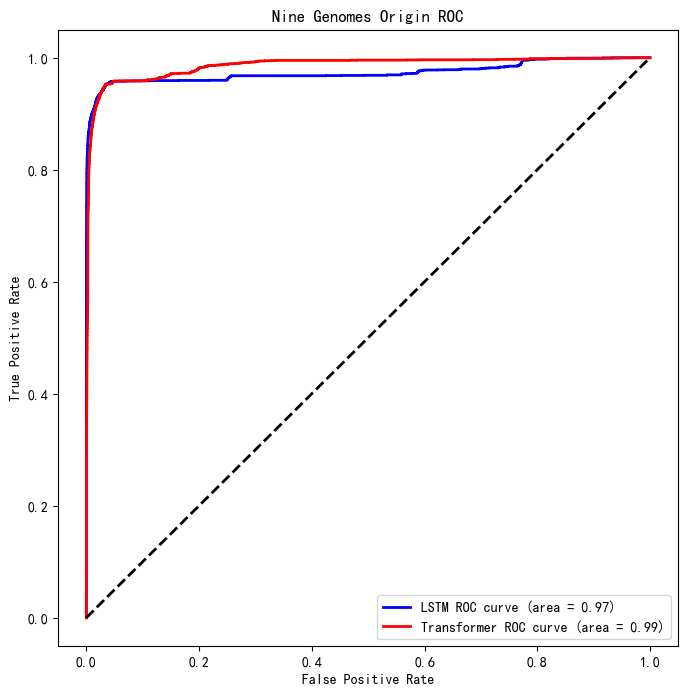

In [19]:
plot_two_curve((NineGM_origin_lstm_distribution, NineGM_origin_lstm_outputsTD), (NineGM_origin_transformer_distribution, NineGM_origin_transformer_outputsTD), 'Nine Genomes Origin')

In [16]:
NineGm_TD_Augmentation_lstm_distribution = np.load(path + 'NineGm_TD_Augmentation_dataset_distribution.npy')
NineGm_TD_Augmentation_lstm_outputsTD = np.load(path + 'NineGm_TD_Augmentation_dataset_outputsTD.npy')

NineGm_transformerEncoder_TD_augmentation_distribution = np.load(path + 'NineGm_transformerEncoder_TD_augmentation_dataset_distribution.npy')
NineGm_transformerEncoder_TD_augmentation_outputsTD = np.load(path + 'NineGm_transformerEncoder_TD_augmentation_dataset_outputsTD.npy')

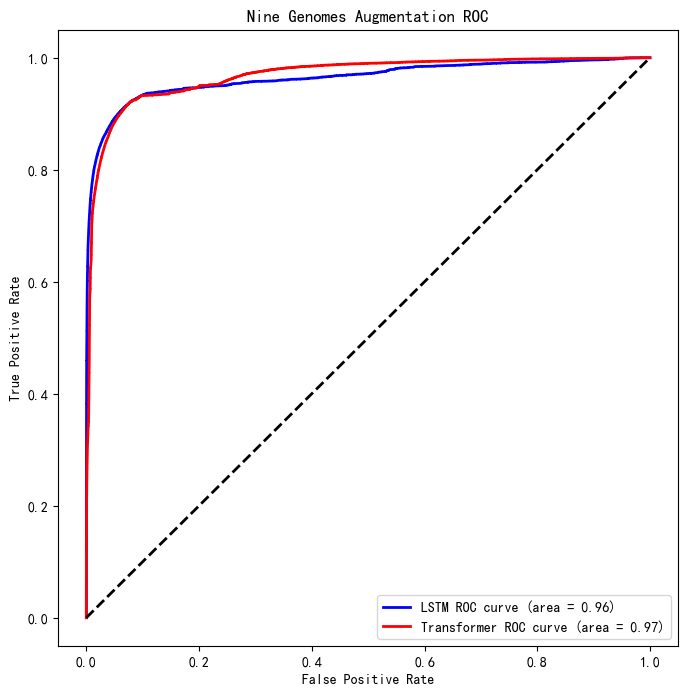

In [20]:
plot_two_curve((NineGm_TD_Augmentation_lstm_distribution, NineGm_TD_Augmentation_lstm_outputsTD), (NineGm_transformerEncoder_TD_augmentation_distribution, NineGm_transformerEncoder_TD_augmentation_outputsTD), 'Nine Genomes Augmentation')

In [21]:
IMG_ABC_TD_origin_lstm_distribution = np.load(path + 'IMG_ABC_TD_origin_dataset_distribution.npy')
IMG_ABC_TD_origin_lstm_outputsTD = np.load(path + 'IMG_ABC_TD_origin_dataset_outputsTD.npy')

img_abc_transformerEncoder_TD_origin_dataset_distribution = np.load(path + 'img_abc_transformerEncoder_TD_origin_dataset_distribution.npy')
img_abc_transformerEncoder_TD_origin_dataset_outputsTD = np.load(path + 'img_abc_transformerEncoder_TD_origin_dataset_outputsTD.npy')

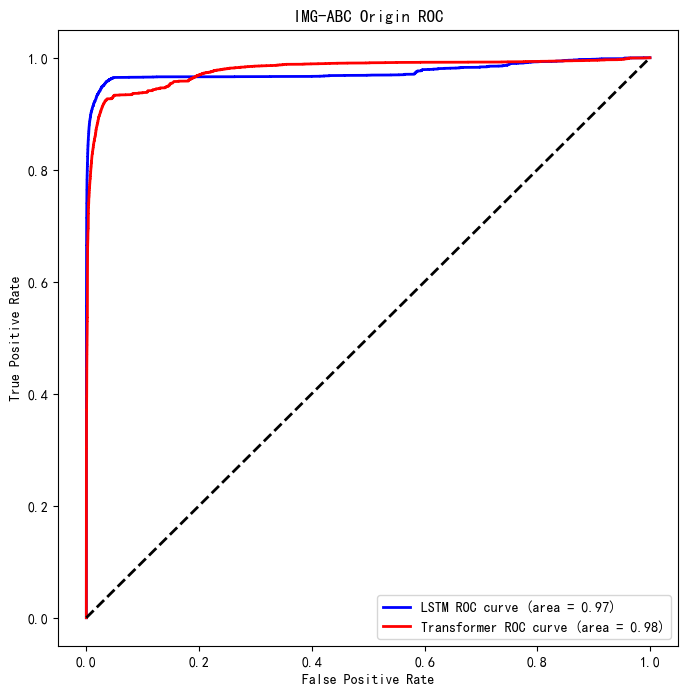

In [22]:
plot_two_curve((IMG_ABC_TD_origin_lstm_distribution, IMG_ABC_TD_origin_lstm_outputsTD),
                (img_abc_transformerEncoder_TD_origin_dataset_distribution, img_abc_transformerEncoder_TD_origin_dataset_outputsTD), 'IMG-ABC Origin')

In [23]:
IMG_ABC_TD_augmentation_lstm_distribution = np.load(path + 'IMG_ABC_TD_augmentation_dataset_distribution.npy')
IMG_ABC_TD_augmentation_lstm_outputsTD = np.load(path + 'IMG_ABC_TD_augmentation_dataset_outputsTD.npy')

img_abc_transformerEncoder_TD_augmentation_dataset_distribution = np.load(path + 'img_abc_transformerEncoder_TD_augmentation_dataset_distribution.npy')
img_abc_transformerEncoder_TD_augmentation_dataset_outputsTD = np.load(path + 'img_abc_transformerEncoder_TD_augmentation_dataset_outputsTD.npy')

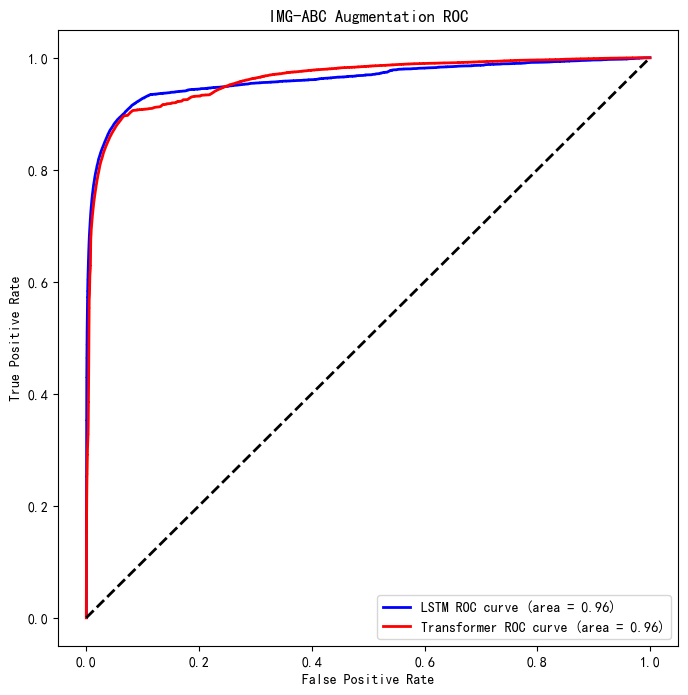

In [24]:
plot_two_curve((IMG_ABC_TD_augmentation_lstm_distribution, IMG_ABC_TD_augmentation_lstm_outputsTD),
                (img_abc_transformerEncoder_TD_augmentation_dataset_distribution, img_abc_transformerEncoder_TD_augmentation_dataset_outputsTD), 'IMG-ABC Augmentation')